In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Loading the dataset
url = 'https://drive.google.com/uc?id=1FHmYNLs9v0Enc-UExEMpitOFGsWvB2dP'
data = pd.read_csv(url)

# Display the first few rows of the dataset
data.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
# Impute missing values
imputer = SimpleImputer(strategy='most_frequent')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Encode categorical variables
label_encoders = {}
for column in data_imputed.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_imputed[column] = le.fit_transform(data_imputed[column])
    label_encoders[column] = le


In [7]:
# Define features and target
X = data_imputed.drop('price', axis=1)
y = data_imputed['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'Support Vector Regressor': SVR()
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = model.score(X_test, y_test)
    mse = np.mean((y_pred - y_test) ** 2)
    mae = np.mean(np.abs(y_pred - y_test))
    results[name] = {'R2': r2, 'MSE': mse, 'MAE': mae}

# Display results
results_df = pd.DataFrame(results).T
results_df.sort_values(by='R2', ascending=False)


,R2,MSE,MAE
Random Forest Regressor,0.915311,236.240024,12.113171
Gradient Boosting Regressor,0.904699,265.841988,12.605241
Linear Regression,0.884311,322.714176,14.839325
Decision Tree Regressor,0.825321,487.268293,14.390244
Support Vector Regressor,0.454721,1521.057410,31.525533


In [11]:
# Display the evaluation metrics
print(results_df)

                                   R2          MSE        MAE
Linear Regression            0.884311   322.714176  14.839325
Decision Tree Regressor      0.825321   487.268293  14.390244
Random Forest Regressor      0.915311   236.240024  12.113171
Gradient Boosting Regressor  0.904699   265.841988  12.605241
Support Vector Regressor     0.454721  1521.057410  31.525533


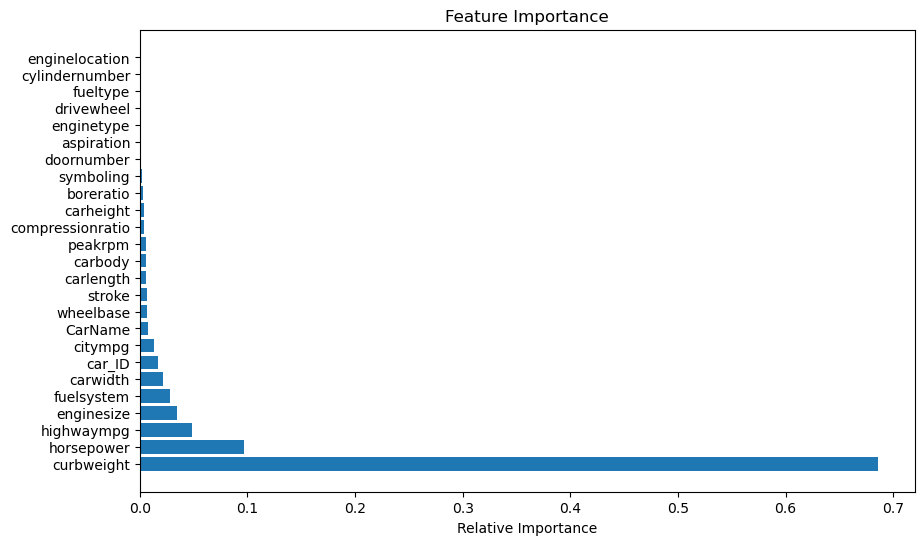

In [13]:
import matplotlib.pyplot as plt

# Initialize and train the Random Forest model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Sort features by importance
indices = np.argsort(importances)[::-1]
features = X.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importance')
plt.barh(range(X.shape[1]), importances[indices], align='center')
plt.yticks(range(X.shape[1]), features[indices])
plt.xlabel('Relative Importance')
plt.show()

In [16]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initializing GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best score: -340.44912971941636
